# Usage Funnels with Warby Parker
## Warby Parker

In this project, you will analyze different Warby Parker’s marketing funnels in order to calculate conversion rates. Here are the funnels and the tables that you are given:

### Quiz Funnel:

- survey

### Home Try-On Funnel:

- quiz
- home_try_on
- purchase

This project was a collaboration with Warby Parker’s Data Science team (thank you!) and uses fictional data.

1. To help users find their perfect frame, Warby Parker has a Style Quiz that has the following questions:

  1. “What are you looking for?”
  2. “What’s your fit?”
  3. “Which shapes do you like?”
  4. “Which colors do you like?”
  5. “When was your last eye exam?”

The users’ responses are stored in a table called survey.

Select all columns from the first 10 rows. What columns does the table have?

```mysql
SELECT * FROM survey
LIMIT 10;
```
![image01](images/image01.png)

2.	Users will “give up” at different points in the survey. Let’s analyze how many users move from Question 1 to Question 2, etc.

Create a quiz funnel using the GROUP BY command.
What is the number of responses for each question?

```mysql
SELECT question, 
 COUNT (DISTINCT user_id)
FROM survey
GROUP BY 1;
```
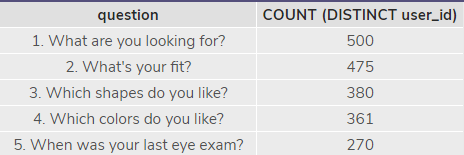

3.	Using a spreadsheet program like Excel or Google Sheets, calculate the percentage of users who answer each question:

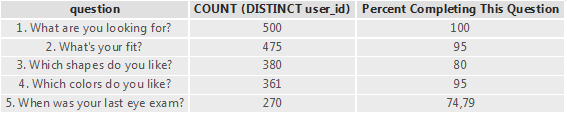

Which question(s) of the quiz have a lower completion rates?

“When was your last eye exam?”

What do you think is the reason?

Probably because people do not like to admit that they do not like their eyes being examined

4.	Warby Parker’s purchase funnel is:
Take the Style Quiz → Home Try-On → Purchase the Perfect Pair of Glasses

During the Home Try-On stage, we will be conducting an A/B Test:
-	50% of the users will get 3 pairs to try on 
-	50% of the users will get 5 pairs to try on

Let’s find out whether or not users who get more pairs to try on at home will be more likely to make a purchase.
The data will be distributed across three tables:
-	Quiz
-	home_try_on
-	purchase

Examine the first five rows of each table
What are the column names?

```mysql
SELECT * FROM quiz
LIMIT 5;
```
```mysql
SELECT * FROM home_try_on
LIMIT 5;
```
```mysql
SELECT * FROM purchase
LIMIT 5;
```
![image.png](attachment:image.png)

5.	We’d like to create a new table with the following layout:

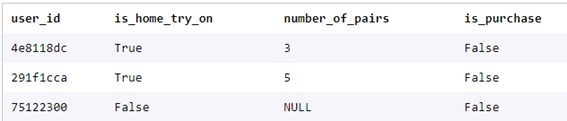
 
Each row will represent a single user from the browse table:
-	If the user has any entries in home_try_on, then is_home_try_on will be ‘True’.
-	number_of_pairs comes from home_try_on table
-	If the user has any entries in is_purchase, then is_purchase will be ‘True’.

Use a LEFT JOIN to combine the three tables, starting with the top of the funnel (quiz) and ending with the bottom of the funnel (purchase).

Select only the first 10 rows from this table (otherwise, the query will run really slowly).

```mysql
SELECT DISTINCT q.user_id,
 h.user_id IS NOT NULL AS "is_home_try_on",
 h.number_of_pairs,
 p.user_id IS NOT NULL AS "is_purchase"
FROM quiz AS "q"
LEFT JOIN home_try_on AS "h"
ON q.user_id = h.user_id
LEFT JOIN purchase AS "p"
ON q.user_id = p.user_id
LIMIT 10;
```
![image.png](attachment:image.png)

6.	Once we have the data in this format, we can analyze it in several ways:
-	We can calculate overall conversion rates by aggregating across all rows.

```mysql
WITH funnels AS (SELECT DISTINCT q.user_id,
 h.user_id IS NOT NULL AS "is_home_try_on",
 h.number_of_pairs,
 p.user_id IS NOT NULL AS "is_purchase"
FROM quiz AS "q"
LEFT JOIN home_try_on AS "h"
ON q.user_id = h.user_id
LEFT JOIN purchase AS "p"
ON q.user_id = p.user_id)
SELECT COUNT(user_id) AS "customers", SUM(is_home_try_on),
SUM(is_purchase)
FROM funnels;
```
![image.png](attachment:image.png)

-	We can compare conversion from quiz→home_try_on and home_try_on→purchase.

```mysql
WITH funnels AS (SELECT DISTINCT q.user_id,
 h.user_id IS NOT NULL AS "is_home_try_on",
 h.number_of_pairs,
 p.user_id IS NOT NULL AS "is_purchase"
FROM quiz AS "q"
LEFT JOIN home_try_on AS "h"
ON q.user_id = h.user_id
LEFT JOIN purchase AS "p"
ON q.user_id = p.user_id)
SELECT COUNT(user_id) AS "quiz", SUM(is_home_try_on) AS "home_try_on",
SUM(is_purchase) AS "purchase",
1.0 * SUM(is_home_try_on) / COUNT(user_id) AS "quiz_home_try",
1.0 * SUM(is_purchase)/ SUM(is_home_try_on) AS "home_try_purchase"
FROM funnels;
```

![image.png](attachment:image.png)

-	We can calculate the difference in purchase rates between customers who had 3 number_of_pairs with ones who had 5.

```mysql
WITH funnels AS (SELECT DISTINCT q.user_id,
 h.user_id IS NOT NULL AS "is_home_try_on",
 h.number_of_pairs,
 p.user_id IS NOT NULL AS "is_purchase"
FROM quiz AS "q"
LEFT JOIN home_try_on AS "h"
ON q.user_id = h.user_id
LEFT JOIN purchase AS "p"
ON q.user_id = p.user_id)
SELECT number_of_pairs,
COUNT(user_id) AS "customers", SUM(is_home_try_on) AS "home_try_on",
SUM(is_purchase) AS "purchase",
1.0 * SUM(is_purchase) / SUM(is_home_try_on) AS "home_try_purchase"
FROM funnels
GROUP BY 1
ORDER BY 1;
```
![image.png](attachment:image.png)

We can also use the original tables to calculate things like:
-	The most common results of the style quiz.

```mysql
SELECT DISTINCT question,
MAX(mycount) as "number",
response AS " most popular reponse"
FROM(SELECT question,
Response,
COUNT(response) AS "mycount"
FROM survey
GROUP BY 2)
GROUP BY 1;
```

![image.png](attachment:image.png)

-	The most common types of purchase made.

```mysql
SELECT model_name,
  color,
  count (color) AS "purchases"
FROM purchase
GROUP BY model_name
ORDER BY 3 DESC;
```
![image.png](attachment:image.png)